<a href="https://colab.research.google.com/github/Phosteve/Machine_Learning_practice/blob/master/End_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install NeMo library. If you are running locally (rather than on Google Colab), comment out the below lines
# and instead follow the instructions at https://github.com/NVIDIA/NeMo#Installation
BRANCH = 'r1.19.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@r1.19.0#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/NVIDIA/NeMo.git (to revision r1.19.0) to /tmp/pip-install-muhmrisi/nemo-toolkit_82a0019e6b7549ae90d223644c2ee2e4
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-muhmrisi/nemo-toolkit_82a0019e6b7549ae90d223644c2ee2e4
  Running command git checkout -b r1.19.0 --track origin/r1.19.0
  Switched to a new branch 'r1.19.0'
  Branch 'r1.19.0' set up to track remote branch 'r1.19.0' from 'origin'.
  Resolved https://github.com/NVIDIA/NeMo.git to commit 2331b063d6f0282fa79c32e4e780db6cc7ef1

In [5]:
# Download local version of NeMo scripts. If you are running locally and want to use your own local NeMo code,
# comment out the below lines and set NEMO_DIR to your local path.
NEMO_DIR = 'nemo'
!git clone https://github.com/NVIDIA/NeMo.git $NEMO_DIR

Cloning into 'nemo'...
remote: Enumerating objects: 111784, done.
remote: Counting objects: 100% (3312/3312), done.
remote: Compressing objects: 100% (1792/1792), done.
remote: Total 111784 (delta 1911), reused 2623 (delta 1461), pack-reused 108472
Receiving objects: 100% (111784/111784), 223.48 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (82303/82303), done.
Updating files: 100% (1943/1943), done.


In [6]:
import torch
import IPython.display as ipd
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from nemo.collections.tts.models.base import SpectrogramGenerator, Vocoder

# List pretrained models available in NeMo
print("Spectrogram Models")
print(SpectrogramGenerator.list_available_models())

print()
print("Vocoders")
print(Vocoder.list_available_models())

[NeMo W 2023-06-21 19:33:10 optimizers:54] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2023-06-21 19:33:14 experimental:27] Module <class 'nemo.collections.asr.modules.audio_modules.SpectrogramToMultichannelFeatures'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-06-21 19:33:15 experimental:27] Module <class 'nemo.collections.tts.models.fastpitch_ssl.FastPitchModel_SSL'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-06-21 19:33:15 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-06-21 19:33:15 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[Ne

Spectrogram Models
[PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is ARPABET-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_ipa,
	description=This model is trained on LJSpeech sampled at 22050Hz with and can be used to generate female English voices with an American accent. It is IPA-based.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/IPA_1.13.0/files/tts_en_fastpitch_align_ipa.nemo,
	class_=<class 'nemo.collections.tts.models.fastpitch.FastPitchModel'>
), PretrainedModelInfo(
	pretrained_model_name=tts_en_fastpitch_multispeaker,
	description=This model is trained o

In [7]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

# Load our spectrogram and vocoder models onto our CPU
spectrogram_model = SpectrogramGenerator.from_pretrained("tts_en_tacotron2").eval().to(device)
vocoder = Vocoder.from_pretrained("tts_en_hifigan").eval().to(device)

[NeMo I 2023-06-21 19:34:50 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_tacotron2/versions/1.10.0/files/tts_en_tacotron2.nemo to /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo
[NeMo I 2023-06-21 19:34:56 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-06-21 19:36:16 tacotron2:340] This checkpoint support will be dropped after NeMo 1.18.0.
[NeMo W 2023-06-21 19:36:17 experimental:27] Module <class 'nemo.collections.tts.g2p.models.i18n_ipa.IpaG2p'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2023-06-21 19:36:18 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-06-21 19:36:18 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /raid/datasets/tts_data/train_manifest.json
      sa

[NeMo I 2023-06-21 19:36:18 features:291] PADDING: 16
[NeMo I 2023-06-21 19:36:18 features:299] STFT using exact pad
[NeMo I 2023-06-21 19:36:20 save_restore_connector:249] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_tacotron2/319a832e78fac50399d90aee0f083927/tts_en_tacotron2.nemo.
[NeMo I 2023-06-21 19:36:20 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_1.19.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2023-06-21 19:36:30 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-06-21 19:36:36 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2023-06-21 19:36:36 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2023-06-21 19:36:36 features:291] PADDING: 0


[NeMo W 2023-06-21 19:36:36 features:268] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2023-06-21 19:36:36 features:291] PADDING: 0
[NeMo I 2023-06-21 19:36:45 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.19.0/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [13]:
text = "I will be summiting my project today"

# Normalize the text and convert it into individual phonemes/tokens.
tokens = spectrogram_model.parse(text, normalize=True)

# Generate spectrogram form text
spectrogram = spectrogram_model.generate_spectrogram(tokens=tokens)

# Invert the spectrogram into audio samples
audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)

# Convert output form pytorch tensor to numpy array
spectrogram = spectrogram.cpu().detach().numpy()[0]
audio = audio.cpu().detach().numpy()[0]

In [14]:
print(f'"{text}"\n')

ipd.Audio(audio, rate=22050)

"I will be summiting my project today"



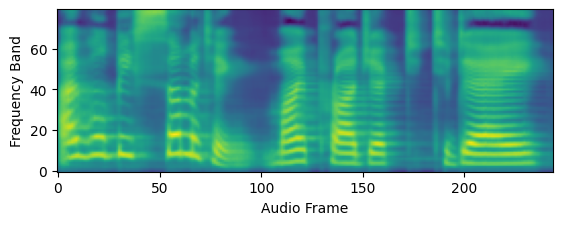

In [15]:
# Visualize the spectrogram
imshow(spectrogram, origin="lower")
plt.xlabel("Audio Frame")
plt.ylabel("Frequency Band")
plt.show()